In [1]:
import numpy as np
import pandas as pd
import re

orders_df  = pd.read_csv('Orders.csv')
returns_df  = pd.read_csv('Returns.csv')

In [2]:
orders_df.Sales = orders_df.Sales.str.replace('[$,]', '')
orders_df.Sales = orders_df.Sales.astype(float)

In [3]:
orders_df.Profit = orders_df.Profit.str.replace('[$,]', '')
orders_df.Profit = orders_df.Profit.astype(float)

In [4]:
orders_df['Order.Date'] = pd.to_datetime(orders_df['Order.Date'])
orders_df['Ship.Date'] = pd.to_datetime(orders_df['Ship.Date'])

In [5]:
orders_df['Month'] = [d.month for d in orders_df['Order.Date']]

In [6]:
orders_df['Year'] = [d.year for d in orders_df['Order.Date']]

In [7]:
orders_df[['Month','Quantity']].groupby(['Month']).agg(['sum','count']).reset_index()
# an increase in sales before each season change with a significant uptick in sales during the holiday months in
# november and december

Month Quantity      
              sum count
0      1     8872  2611
1      2     7429  2209
2      3    10390  3007
3      4    10466  3032
4      5    13196  3787
5      6    18009  5302
6      7    11046  3195
7      8    17596  5065
8      9    20479  5958
9     10    16303  4556
10    11    22379  6311
11    12    22147  6257

In [8]:
trend_df = orders_df[['Month','Quantity','Category']].groupby(['Month','Category']).agg(['sum','count']).reset_index()

In [9]:
returns = orders_df.merge(returns_df, left_on='Order.ID', right_on='Order ID')

In [10]:
# Profit loss 
returns[['Year','Profit']].groupby('Year').sum()

,Profit
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [11]:
orders_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,2014


In [12]:
returns_df.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [13]:
returns.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.0,720.36,725.57,Critical,12,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,153.75,627.27,Critical,12,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,311.85,458.97,Critical,12,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,114.60,203.92,Critical,12,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,68.22,25.48,Critical,12,2012,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [33]:
return_freq = returns[['Customer.ID','Returned']].groupby('Customer.ID').agg('count').reset_index()

In [34]:
return_freq.head()

,Customer.ID,Returned
0,AA-1031558,1
1,AA-106451404,1
2,AA-1064559,3
3,AA-1064564,1
4,AA-645137,1


In [44]:
sum(return_freq.Returned > 1)


547

In [57]:
sum(return_freq.Returned > 5)

46

In [51]:
return_region = returns[['Region_y','Returned']].groupby('Region_y').agg('count').reset_index()

In [56]:
return_region.sort_values('Returned', ascending=False

,Region_y,Returned
2,Central America,248
22,Western Europe,233
23,Western US,180
12,Oceania,154
14,Southeastern Asia,140
9,Eastern US,134
13,South America,133
6,Eastern Asia,131
17,Southern Europe,112
16,Southern Asia,111


In [61]:
returns_subcat = returns[['Sub.Category','Returned']].groupby('Sub.Category').agg('count').reset_index()

In [62]:
returns_subcat.sort_values('Returned', ascending=False)

,Sub.Category,Returned
3,Binders,269
2,Art,217
14,Storage,212
12,Paper,150
5,Chairs,147
13,Phones,145
0,Accessories,138
10,Labels,137
9,Furnishings,135
4,Bookcases,104


In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

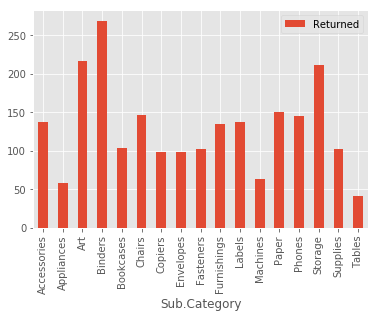

In [67]:
returns[['Sub.Category','Returned']].groupby('Sub.Category').agg('count').plot.bar()